In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


In [10]:
df=pd.read_csv("C:\\Users\\sudha\\Documents\\playgolf_data.csv")
# df.head()
df1=df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [26]:
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [23]:
from sklearn.preprocessing import LabelEncoder
#feature encode
le= LabelEncoder()
for col in df.columns:
    df[col]=df[col].astype('category')# changing the datatype to category
    df[col]=le.fit_transform(df[col])#encoding the data or columns
df

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int64
 1   Temperature  14 non-null     int64
 2   Humidity     14 non-null     int64
 3   Wind         14 non-null     int64
 4   PlayGolf     14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


In [27]:
# divide x and y variables
x=df.drop(['PlayGolf'], axis=1)
y=df['PlayGolf']


In [33]:
#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state =42)
print(x_train.shape)
y_train.shape

(9, 4)


(9,)

In [34]:
#model building
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(criterion='entropy',random_state=0)
clf= clf.fit(x,y)

In [35]:
#predictions
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 0, 1, 0], dtype=int64)

In [37]:
#performance evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test,y_pred)

1.0

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



<AxesSubplot:>

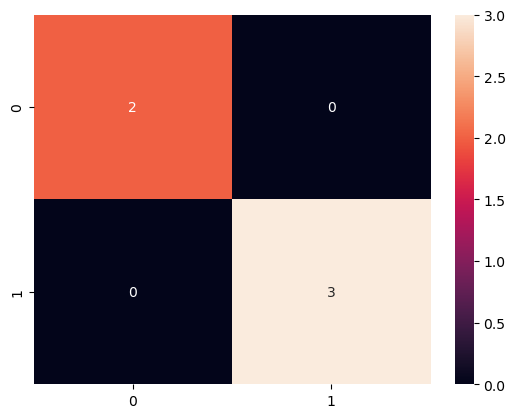

In [39]:
import seaborn as sns
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True)

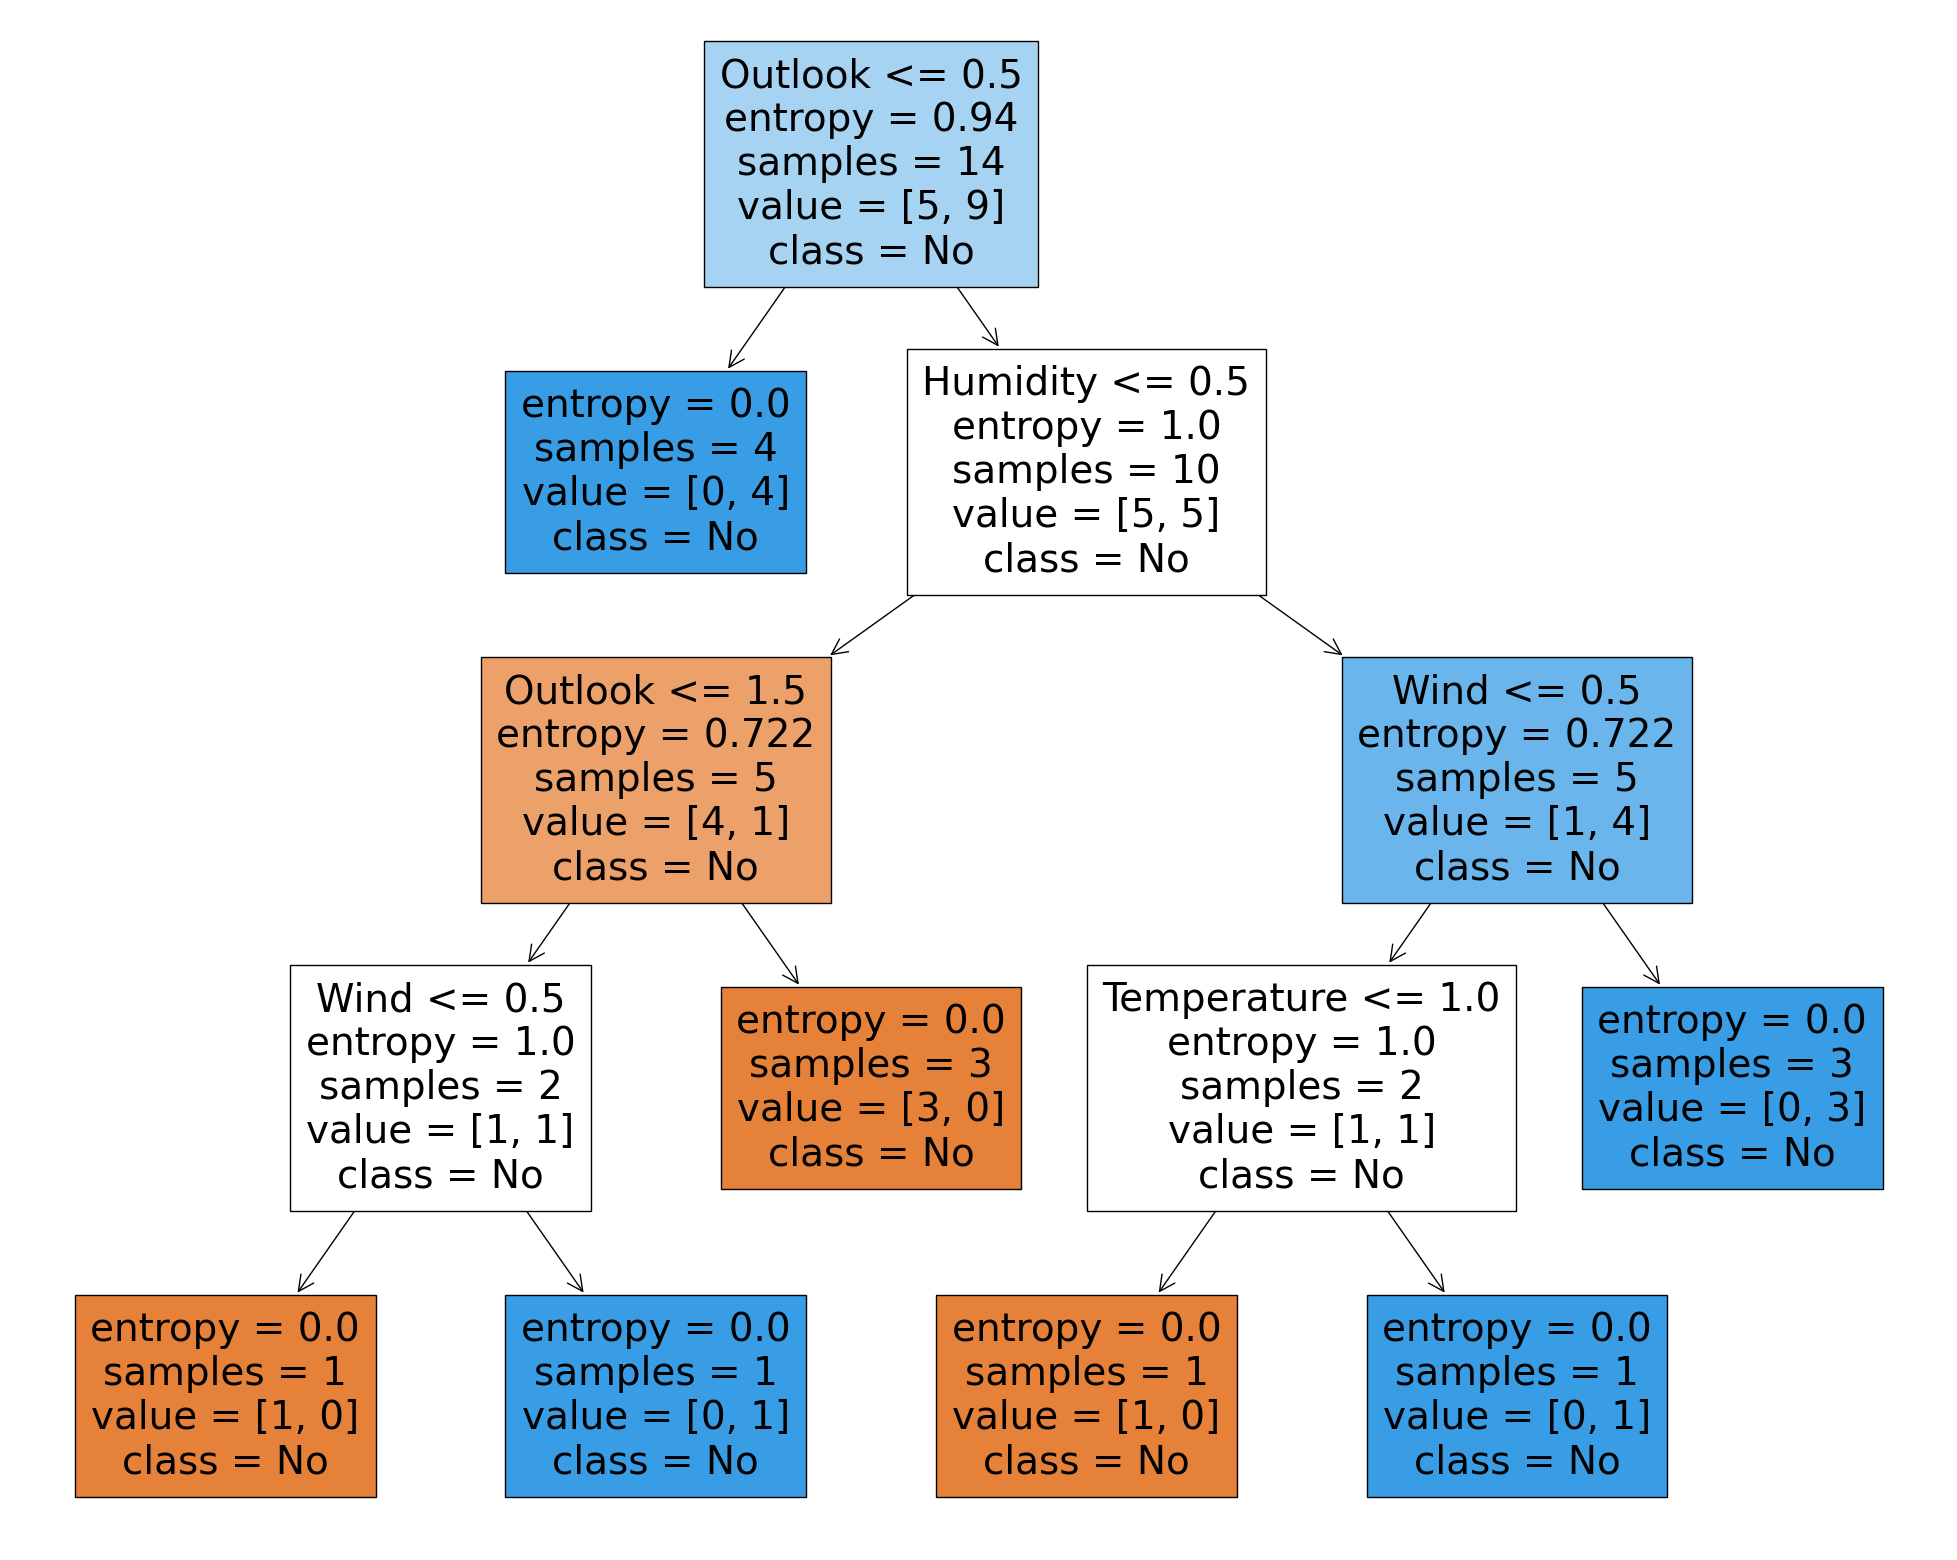

In [46]:
#decision tree
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf, feature_names=df1.columns, class_names=df1['PlayGolf'],filled=True)